In [1]:
from importlib import reload
import sys
import actorcritic as ac
import environment as gw
import memory as ec

sys.modules['gw'] = gw
sys.modules['ac'] = ac
# TODO -- need to do this for all imported modules????

import run_experiment as expt
import torch
import pickle
import pandas as pd

from analysis import DataFilter
## remove after july 24
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors 
import matplotlib.colorbar as colorbar

from environment import plotting as gp

In [2]:
parent_dir = './data/'
log_file = 'sep2020.csv'

#load_id = '0deeec74-183d-4694-a3d2-495d03d20b46' #no SR 
load_id = '016375f6-eb4f-46b5-8ce1-80a6ad0ad603' # with SR

#load_id = '63219983-39ed-4549-86c3-cbc246b05abd' # sr with bar
#load_id = '4a37792b-8b25-4565-8819-4e047c8813da' # sr with 4rooms
#load_id = '23ea842f-e643-4959-8409-eecd83086539' #4 rooms no sr

#load_id = '32391bc3-ff27-4526-a332-5e80eb70d5c7' #4 rooms w neg reward no sr
#load_id = "cc24a23f-108e-4406-bfa5-80f36b8d2702" 
#load_id = '2be9854b-4a65-4eb7-b833-e1776890f1f0' # max space reward arch b


agent = torch.load(parent_dir + f'agent_weights/{load_id}.pt')
env = pickle.load(open(parent_dir + f'environments/{load_id}_env.p', 'rb'))
# create experiment object
ex = expt.Experiment(agent, env)

/usr/local/lib/python3.8/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or se

In [3]:
samples, states = env.get_sample_obs()

print(agent.use_SR)

True


In [59]:
if agent.use_SR: 
    p, v, phi, psi = agent(torch.Tensor(samples))
else: 
    p, v, psi  = agent(torch.Tensor(samples))
    
activias = psi

(10, 10)


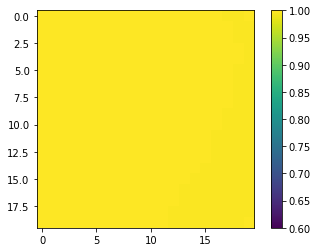

In [60]:
from scipy.spatial import distance as d

cos_sims = np.zeros((20,20))
cos_sims[:] = np.nan
iind = 210
for state, activity in zip([states[iind]],[activias[iind]]):
    print(state)
    for sref, ref in zip(states, activias):
        cs = 1 - d.cosine(ref.detach().numpy(), activity.detach().numpy())
        cos_sims[sref[0], sref[1]] = cs
    
    plt.figure()
    plt.imshow(cos_sims, vmin=0.6, vmax=1)
    plt.colorbar()
    plt.show()
    plt.close()

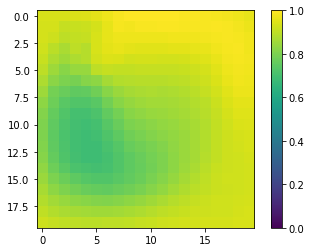

In [34]:
cos_sims = np.zeros((20,20))
cos_sims[:] = np.nan

for state, activity in zip(states,activias):
    for sref, ref in zip(states, activias):
        cs = 1 - d.cosine(ref.detach().numpy(), activity.detach().numpy())
        cos_sims[sref[0], sref[1]] = cs
    
    plt.figure()
    plt.imshow(cos_sims, vmin=0.8, vmax=1)
    plt.colorbar()
    plt.show()
    plt.close()

In [80]:
x = np.zeros(env.shape)
x[:,:] = np.nan
monstro = np.asarray([x for i in range(len(activias[0]))])

In [81]:
print(len(activias[0]))

200


In [82]:
for ind, state in enumerate(states):
    row = state[0]
    col = state[1]
    
    for index, item in enumerate(activias[ind]):
        monstro[index, row, col] = item

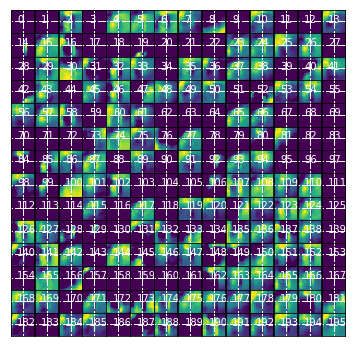

In [83]:
fig, ax = plt.subplots(14,14, sharex=True, sharey=True, figsize=(6,6))

cmap = cm.viridis
cNorm = colors.Normalize(vmin=np.nanmin(monstro), vmax=np.nanmax(monstro))

for i, a in enumerate(ax.flat):
    a.imshow(monstro[i], cmap=cmap)#, norm=cNorm)
    a.get_xaxis().set_ticks([])
    a.get_yaxis().set_ticks([])
    a.annotate(xy=(5,10), s=f"{i}", color='white')
    
plt.subplots_adjust(wspace=0, hspace=0)

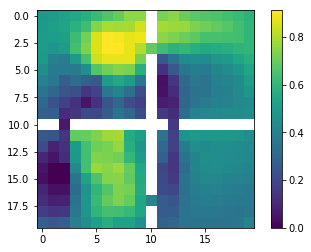

In [86]:
for index in [2]:
    plt.figure()
    ax1 = fig.add_axes([0, 0, 0.85, 0.85])
    axc = fig.add_axes([0.75, 0, 0.05, 0.85])
    ax1 = plt.imshow(monstro[index])
    plt.colorbar()
    
    plt.savefig('../../../Writing/Presentations/Figs/committee4/place_field.svg', format='svg')
    plt.show()
    plt.close()
    
